In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
conn = psycopg2.connect(
   database="postgres", user='postgres', password='majd1997', 
   host='127.0.0.1', port= '5432'
)

In [4]:
df = pd.read_sql_query("SELECT * FROM disney",conn)

In [5]:
df = df.set_index('id')

In [36]:
## collecting bunch of information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 1 to 928
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          928 non-null    object
 1   title         928 non-null    object
 2   director      928 non-null    object
 3   casting       928 non-null    object
 4   country       928 non-null    object
 5   date          928 non-null    object
 6   release_year  928 non-null    int64 
 7   rating        928 non-null    object
 8   duration      928 non-null    object
 9   listed_in     928 non-null    object
 10  description   928 non-null    object
dtypes: int64(1), object(10)
memory usage: 127.0+ KB


Text(0, 0.5, 'count')

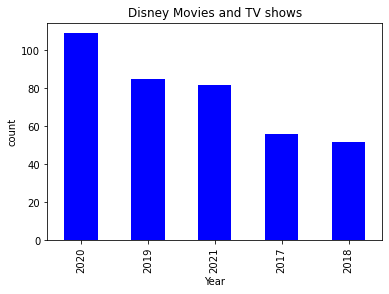

In [6]:
## Movies and TV shows by year release
df['release_year'].value_counts().nlargest(5).plot(kind="bar",color='blue')
plt.title("Disney Movies and TV shows")
plt.xlabel("Year")
plt.ylabel("count")

In [8]:
print("The most movies and shows has been produced in USA : ",df.iloc[:,4].value_counts().nlargest(1)[0])

The most movies and shows has been produced in USA :  762


Text(0.5, 1.0, 'Movie and Shows by Year')

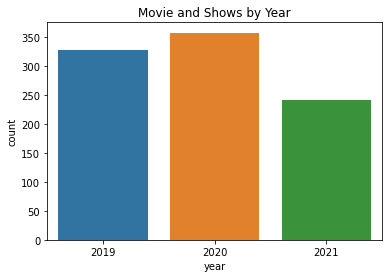

In [17]:
sns.countplot(pd.to_datetime(df.iloc[:,5]).dt.year)
plt.xlabel("year")
plt.title("Movie and Shows by Year")

TV-PG       222
TV-G        207
PG          159
G           110
TV-Y7        79
TV-14        66
TV-Y         40
PG-13        36
TV-Y7-FV      9
Name: rating, dtype: int64


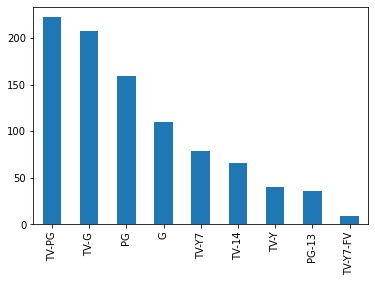

In [23]:
df.iloc[:,7].value_counts().plot(kind="bar")
print(df.iloc[:,7].value_counts())

In [27]:
## Logistic Regression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
print("Number of attributes: ",len(list(df.columns)))
print("Attributes: ",list(df.columns))

Number of attributes:  11
Attributes:  ['type', 'title', 'director', 'casting', 'country', 'date', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [50]:
## preparing our data
data = pd.get_dummies(df,columns=['type','rating']).iloc[:,9:]

In [56]:
X = data.iloc[:,1:]

In [57]:
Y = data.iloc[:,0]
Y

id
1      1
2      1
3      1
4      0
5      0
      ..
924    0
925    1
926    1
927    0
928    0
Name: type_Movie, Length: 928, dtype: uint8

In [61]:
## split our data into trainning and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [62]:
logit = LogisticRegression()

In [63]:
logit.fit(X_train,Y_train)

LogisticRegression()

In [69]:
logit.predict(X_test)
print('Accuracy: {:.2f}'.format(logit.score(X_test, Y_test)))

Accuracy: 1.00
